In [4]:
import pycountry

In [44]:
america = pycountry.countries.get(alpha_3='USA')

In [45]:
america

Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')

In [54]:
states=list(pycountry.subdivisions.get(country_code='US'))
states=sorted([i.name for i in states])
print(states)

['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'United States Minor Outlying Islands', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [55]:
states.remove('American Samoa')
states.remove('District of Columbia')
states.remove('Guam')
states.remove('Northern Mariana Islands')
states.remove('Puerto Rico')
states.remove('United States Minor Outlying Islands')
states.remove('Virgin Islands')

In [56]:
len(states)

50

In [57]:
all_states=states

In [58]:
import networkx as nx
import matplotlib.pyplot as plt

In [61]:
USA = nx.Graph()
USA.add_nodes_from(all_states)

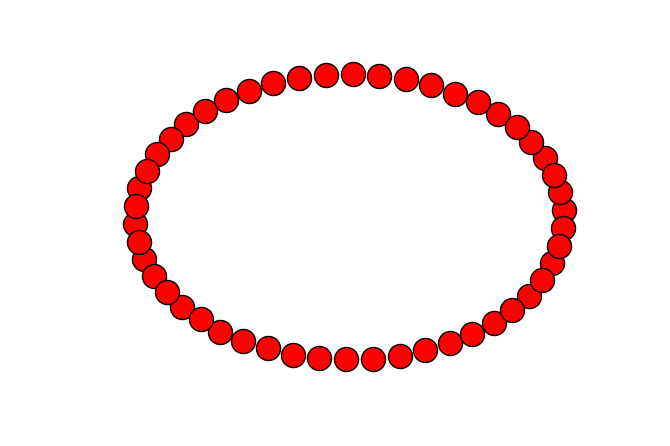

In [62]:
nx.draw(USA)
plt.show()